In [23]:
# train a linear svc on a linearly seperable dataset then train an svc and a sgd classifer on the same dataset

In [51]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
import numpy as np

In [67]:
iris = load_iris()
x = iris['data'][: , 2:]
y = iris.target

setosa_versicolor = (y == 0) | (y == 1)
x = x[setosa_versicolor]
y = y[setosa_versicolor]

In [68]:
iris.feature_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
x.shape , y.shape

((100, 2), (100,))

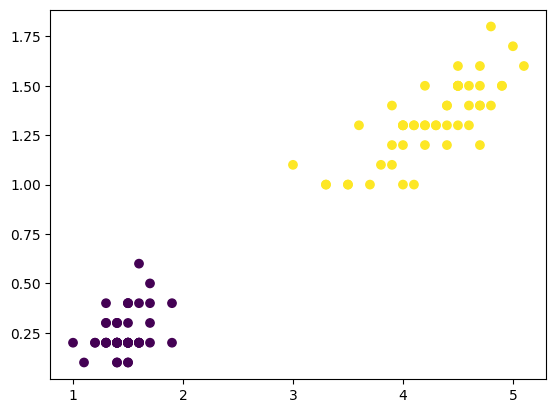

In [70]:
plt.scatter(x[: , 0] , x[: ,1] , c=y )
plt.show()

In [71]:
#linear svc 


linear_svc = Pipeline([
    ("standardize" , StandardScaler()),
    ("linear svc" , LinearSVC())
])

linear_svc.fit(x , y)



,steps,"[('standardize', ...), ('linear svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [79]:
# svc

svc_clf = Pipeline([
    ("standardize" , StandardScaler()),
    ("svc" , SVC(kernel="linear"))
])

svc_clf.fit(x , y)

,steps,"[('standardize', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'


In [73]:
#sgd clf

sgd_clf = Pipeline([
    ("StandardScaler" , StandardScaler()),
    ("sgd" , SGDClassifier())
])

sgd_clf.fit(x , y)

,steps,"[('StandardScaler', ...), ('sgd', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15


In [74]:
def plot_orginial(x , y):
    plt.scatter(x[: , 0] , x[: ,1] , c=y )


In [75]:
def plot_and_new_data(model):
    x1_new = np.linspace(1 , 7 , 100)
    x2_new = np.linspace(0 , 2.5 , 100)
    
    x1_meshgrid , x2_meshgrid = np.meshgrid(x1_new , x2_new)
    
    x_final_points = np.c_[x1_meshgrid.ravel() , x2_meshgrid.ravel()]
    
    y_pred = model.predict(x_final_points).reshape(x1_meshgrid.shape)
    
    plt.contourf(x1_meshgrid , x2_meshgrid , y_pred , alpha= 0.3)
    plt.show()
    
    
    
    

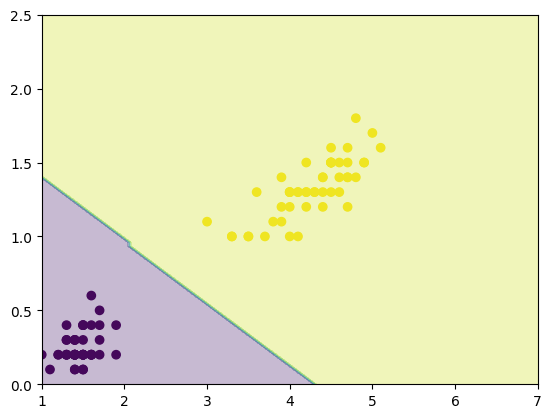

In [76]:
plot_orginial(x,y)
plot_and_new_data(linear_svc)

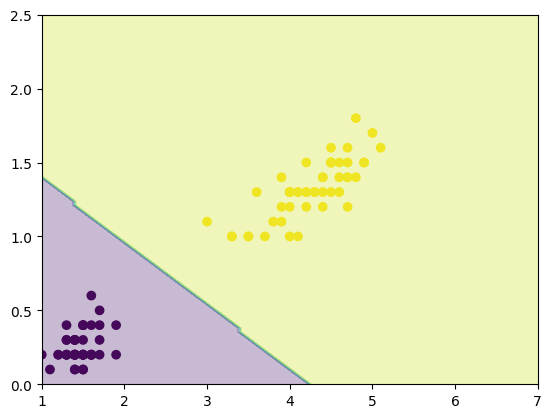

In [80]:
plot_orginial(x,y)
plot_and_new_data(svc_clf)

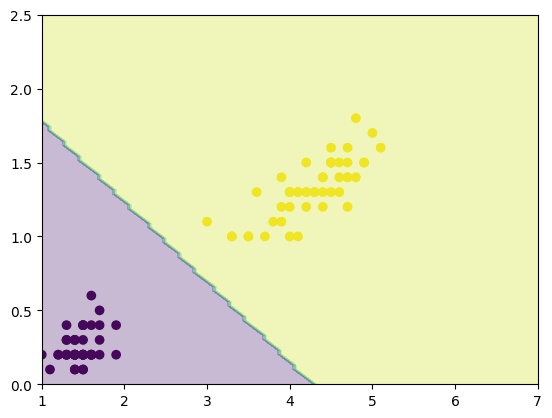

In [78]:
plot_orginial(x , y)
plot_and_new_data(sgd_clf)